## Decomposition is done using LOESS regression i.e. localized regression

In [42]:
import pandas as pd

from datetime import datetime
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import STL

In [43]:
df = pd.read_csv(r"https://raw.githubusercontent.com/ritvikmath/Time-Series-Analysis/master/ice_cream_interest.csv")

In [44]:
df.month = df.month.apply(lambda x : datetime.strptime(x, '%Y-%m'))
df.set_index("month", inplace=True)
df = df.asfreq(pd.infer_freq(df.index))

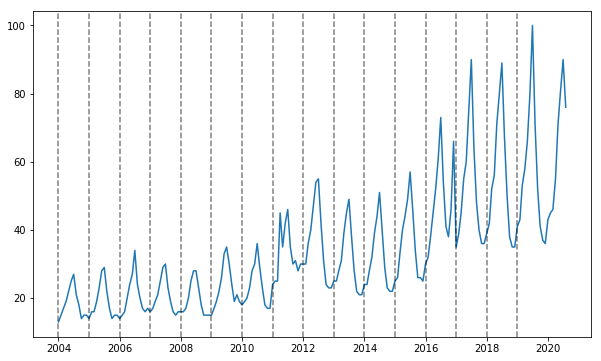

In [46]:
plt.figure(figsize=(10,6))
plt.plot(df)

min_index = df.index.min().year
max_index = df.index.max().year

for year in range(min_index, max_index):
    plt.axvline(datetime(year, 1, 1), linestyle='--', color='k', alpha=0.5)

## Try STL decomposition

In [48]:
stl = STL(df)
result = stl.fit()

In [107]:
seasonal, trend, resid = result.seasonal, result.trend, result.resid

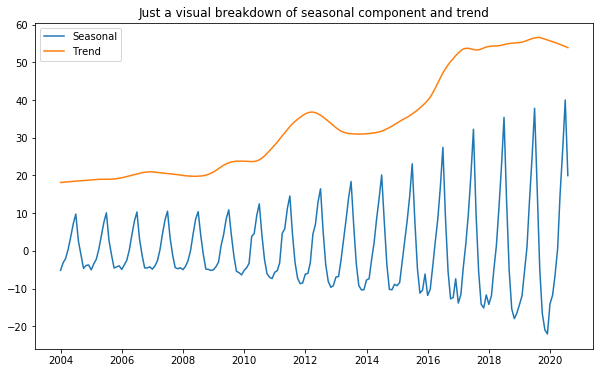

In [53]:
plt.figure(figsize=(10,6))
plt.plot(seasonal)
plt.plot(trend)
plt.title("Just a visual breakdown of seasonal component and trend")
plt.legend(['Seasonal', 'Trend'])

## Can be observed that intensity of seaonal component was increasing implying the increase in volatility in the later years

## trend looks alright

Text(0.5, 1.0, 'Residual')

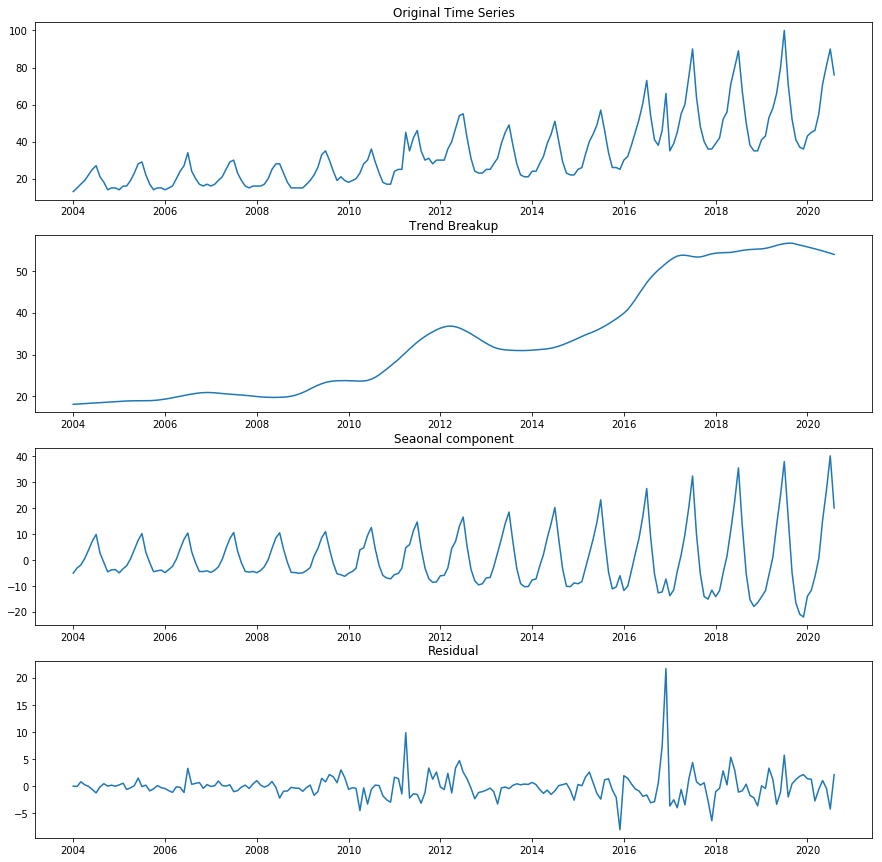

In [60]:
plt.figure(figsize=(15,15))

plt.subplot(4,1,1)
plt.plot(df)
plt.title("Original Time Series")

plt.subplot(4,1,2)
plt.plot(trend)
plt.title("Trend Breakup")

plt.subplot(4,1,3)
plt.plot(seasonal)
plt.title("Seaonal component")

plt.subplot(4,1,4)
plt.plot(resid)
plt.title("Residual")

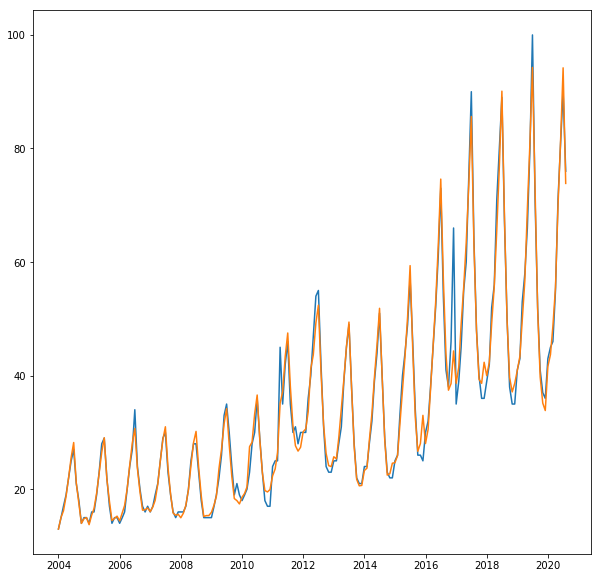

In [61]:
estimated = trend + seasonal
plt.figure(figsize=(10,10))
plt.plot(df)
plt.plot(estimated)

## One large blue in and around 2017 seems like an outlier

## look into how to detect anomaly

# Anomaly Detection

In [64]:
"""
Try to fit or assume distribution of white noise or residual, 
you can also use z-values accordingly if you want some fancy percentile
"""

resid_mean = resid.mean()
resid_std = resid.std()

upper_limit = resid_mean + 3*resid_std
lower_limit = resid_mean - 3*resid_std

(731581.0, 737942.0)

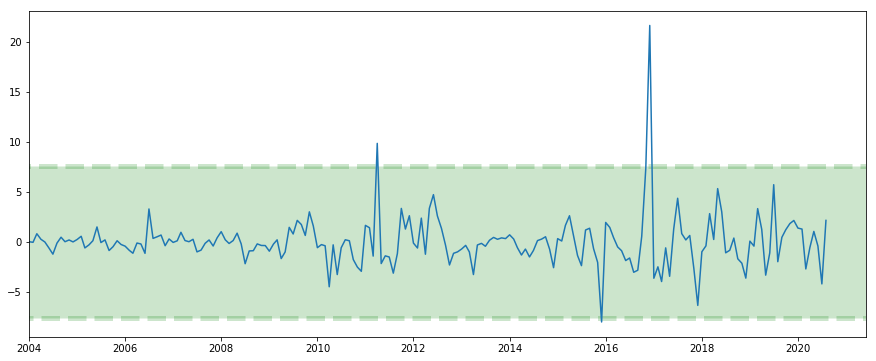

In [74]:
plt.figure(figsize=(15,6))
plt.plot(resid)

plt.fill_between([datetime(2003,1,1), datetime(2021,8,1)], lower_limit, upper_limit, color='g', alpha=0.2, linestyle='--', linewidth=5)

# quite a good attribute if you just want to show only some things to validation team
plt.xlim(datetime(2004,1,1), datetime(2021,6,1))


## Can observe 2 outliers in the upper direction

In [114]:
"""
I am not sure why this bitwise or operator works and normal operator does not
Take a look into stack overflow, someone have nicely explained this.
"""
resid  = pd.DataFrame(resid)
df_resid = resid[(resid['resid'] > upper_limit) |
              (resid['resid'] < lower_limit)]

In [115]:
df_resid

,resid
month,
2011-04-01,9.854035
2015-12-01,-8.010251
2016-12-01,21.648604


In [139]:
df_anomalies = df_resid.join(df, how='inner')
print(df_anomalies)

                resid  interest
month                          
2011-04-01   9.854035        45
2015-12-01  -8.010251        25
2016-12-01  21.648604        66


In [137]:
df_anomalies = df_anomalies['interest']

In [138]:
df_anomalies

month
2011-04-01    45
2015-12-01    25
2016-12-01    66
Name: interest, dtype: int64

ValueError: x and y must be the same size

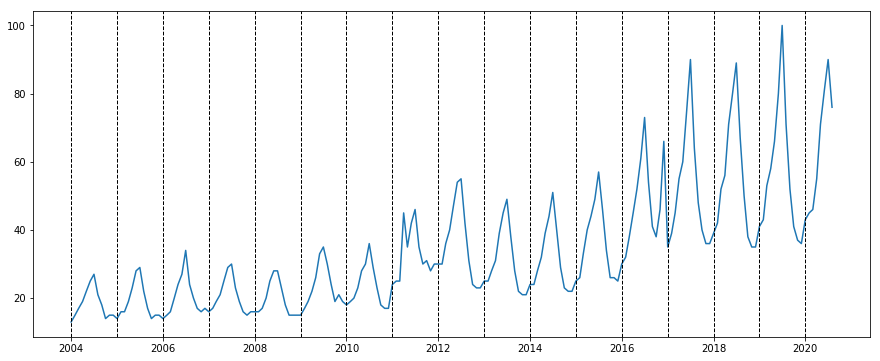

In [142]:
plt.figure(figsize=(15,6))
plt.plot(df)

for year in range(2004, 2021):
    plt.axvline(datetime(year,1,1), linestyle='--', linewidth=1, color='k')
    
plt.scatter(df_anomalies.index, df_anomalies.values)